Датасет представлен тремя файлами, расположенными в папке Data, которые содержат следующую информацию:
- **Injection wells.xlsx**, файл содержит информацию о нагнетательных скважинах, а именно их приемистость на каждый из дней, а также пластовое давление и размер штуцера для некоторых из них
- **Production_wells_train.xlsx**, файл содержит информацию о добывающих скважинах, объемы добытых жидкости и нефти, а также информацию по пластовым и забойным давлениям.
- **Well_coordinates.xlsx**, файл содержит информацию о координатах пластопересечений для всех скважин
- **Sample_submission.xlsx**, файл содержит пример того, как должен быть выведен прогноз по добыче с целью его последующей оценки

In [110]:
# imports
import pandas as pd
from path import Path
import missingno as msno
import matplotlib.pyplot as plt
from math import isnan
import numpy as np

In [111]:
path_to_raw_data = Path.joinpath("..",
    "data", "raw"
)

path_to_processed_data = Path.joinpath("..",
    "data", "processed"
)


In [112]:
df_inj = pd.read_excel(Path.joinpath(path_to_raw_data, "Injection_wells.xlsx"))
df_inj['group'] = 'I'
df_inj
#injection_wells[injection_wells["Well"] == 0].dropna()

,Well,Date,Injectivity,FormationPressure,Choke,group
0,0,1991-10-07,7.777000,NaN,NaN,I
1,0,1991-10-08,20.001000,NaN,NaN,I
2,0,1991-10-09,28.983000,NaN,NaN,I
3,0,1991-10-10,66.282000,NaN,NaN,I
4,0,1991-10-11,69.508000,NaN,NaN,I
...,...,...,...,...,...,...
122035,66,1999-11-06,204.056372,NaN,NaN,I
122036,66,1999-11-07,206.872818,NaN,6.0,I
122037,66,1999-11-08,206.595581,NaN,NaN,I
122038,66,1999-11-09,207.320831,NaN,NaN,I


In [113]:
df_inj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122040 entries, 0 to 122039
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Well               122040 non-null  int64         
 1   Date               122040 non-null  datetime64[ns]
 2   Injectivity        122040 non-null  float64       
 3   FormationPressure  115850 non-null  float64       
 4   Choke              31774 non-null   float64       
 5   group              122040 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 5.6+ MB


<Axes: >

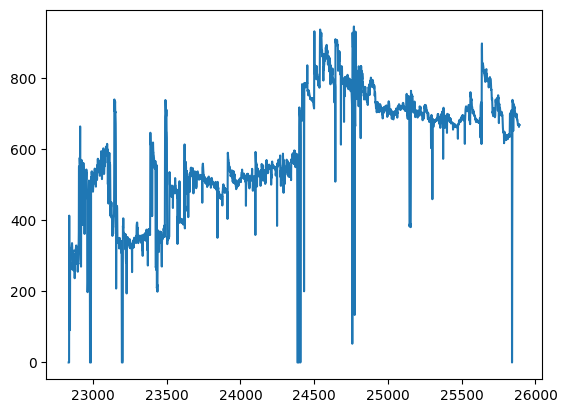

In [114]:
df_inj[df_inj['Well']==12]['Injectivity'].plot()

In [115]:
df_inj[(df_inj['Well']==12) & (df_inj['Injectivity'] == 0)]

,Well,Date,Injectivity,FormationPressure,Choke,group
22835,12,1991-06-27,0.0,185.6,2.0,I
22836,12,1991-06-28,0.0,185.6,3.0,I
22837,12,1991-06-29,0.0,185.6,3.0,I
22838,12,1991-06-30,0.0,185.6,NaN,I
22980,12,1991-11-19,0.0,238.9,NaN,I
22981,12,1991-11-20,0.0,238.9,NaN,I
22982,12,1991-11-21,0.0,238.9,10.0,I
22983,12,1991-11-22,0.0,238.9,NaN,I
22984,12,1991-11-23,0.0,238.9,NaN,I
22985,12,1991-11-24,0.0,238.9,NaN,I


In [116]:
df_prod = pd.read_excel(Path.joinpath(path_to_raw_data, "Production_wells_train.xlsx"))
df_prod['group'] = 'P'
df_prod

,Well,Date,Oil production rate,Liquid production rate,FormationPressure,BottomHolePressure,group
0,0,1987-03-09,47.923,49.001,NaN,57.0,P
1,0,1987-03-10,34.027,34.792,NaN,57.0,P
2,0,1987-03-11,44.988,46.000,NaN,66.0,P
3,0,1987-03-12,44.988,46.000,NaN,63.0,P
4,0,1987-03-13,44.988,46.000,NaN,61.0,P
...,...,...,...,...,...,...,...
24656,114,1991-06-05,11.593,186.999,226.0,223.0,P
24657,114,1991-06-06,11.593,186.999,226.0,223.0,P
24658,114,1991-06-07,11.593,186.999,226.0,223.0,P
24659,114,1991-06-08,10.213,187.707,226.0,224.0,P


In [117]:
df_prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24661 entries, 0 to 24660
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Well                    24661 non-null  int64         
 1   Date                    24661 non-null  datetime64[ns]
 2   Oil production rate     24661 non-null  float64       
 3   Liquid production rate  24661 non-null  float64       
 4   FormationPressure       20366 non-null  float64       
 5   BottomHolePressure      24508 non-null  float64       
 6   group                   24661 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.3+ MB


In [118]:
df_prod["water"] = df_prod["Liquid production rate"] - df_prod["Oil production rate"]
df_prod["watercut"] = df_prod["water"] / df_prod["Liquid production rate"]
df_prod["watercut"] = df_prod["watercut"].fillna(0)

In [119]:
df = pd.concat([df_prod, df_inj])
df

,Well,Date,Oil production rate,Liquid production rate,FormationPressure,BottomHolePressure,group,water,watercut,Injectivity,Choke
0,0,1987-03-09,47.923,49.001,NaN,57.0,P,1.078,0.022000,NaN,NaN
1,0,1987-03-10,34.027,34.792,NaN,57.0,P,0.765,0.021988,NaN,NaN
2,0,1987-03-11,44.988,46.000,NaN,66.0,P,1.012,0.022000,NaN,NaN
3,0,1987-03-12,44.988,46.000,NaN,63.0,P,1.012,0.022000,NaN,NaN
4,0,1987-03-13,44.988,46.000,NaN,61.0,P,1.012,0.022000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
122035,66,1999-11-06,NaN,NaN,NaN,NaN,I,NaN,NaN,204.056372,NaN
122036,66,1999-11-07,NaN,NaN,NaN,NaN,I,NaN,NaN,206.872818,6.0
122037,66,1999-11-08,NaN,NaN,NaN,NaN,I,NaN,NaN,206.595581,NaN
122038,66,1999-11-09,NaN,NaN,NaN,NaN,I,NaN,NaN,207.320831,NaN


In [120]:
rename_dict = {"Well": "cat", "Date": "date", "Oil production rate": "oil", "Liquid production rate": "liquid",
              "FormationPressure" : "fp","BottomHolePressure" : "bhp", "Injectivity" : "water_inj", "Choke" : "choke"}
df.rename(columns=rename_dict, inplace=True)
df

,cat,date,oil,liquid,fp,bhp,group,water,watercut,water_inj,choke
0,0,1987-03-09,47.923,49.001,NaN,57.0,P,1.078,0.022000,NaN,NaN
1,0,1987-03-10,34.027,34.792,NaN,57.0,P,0.765,0.021988,NaN,NaN
2,0,1987-03-11,44.988,46.000,NaN,66.0,P,1.012,0.022000,NaN,NaN
3,0,1987-03-12,44.988,46.000,NaN,63.0,P,1.012,0.022000,NaN,NaN
4,0,1987-03-13,44.988,46.000,NaN,61.0,P,1.012,0.022000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
122035,66,1999-11-06,NaN,NaN,NaN,NaN,I,NaN,NaN,204.056372,NaN
122036,66,1999-11-07,NaN,NaN,NaN,NaN,I,NaN,NaN,206.872818,6.0
122037,66,1999-11-08,NaN,NaN,NaN,NaN,I,NaN,NaN,206.595581,NaN
122038,66,1999-11-09,NaN,NaN,NaN,NaN,I,NaN,NaN,207.320831,NaN


<Axes: >

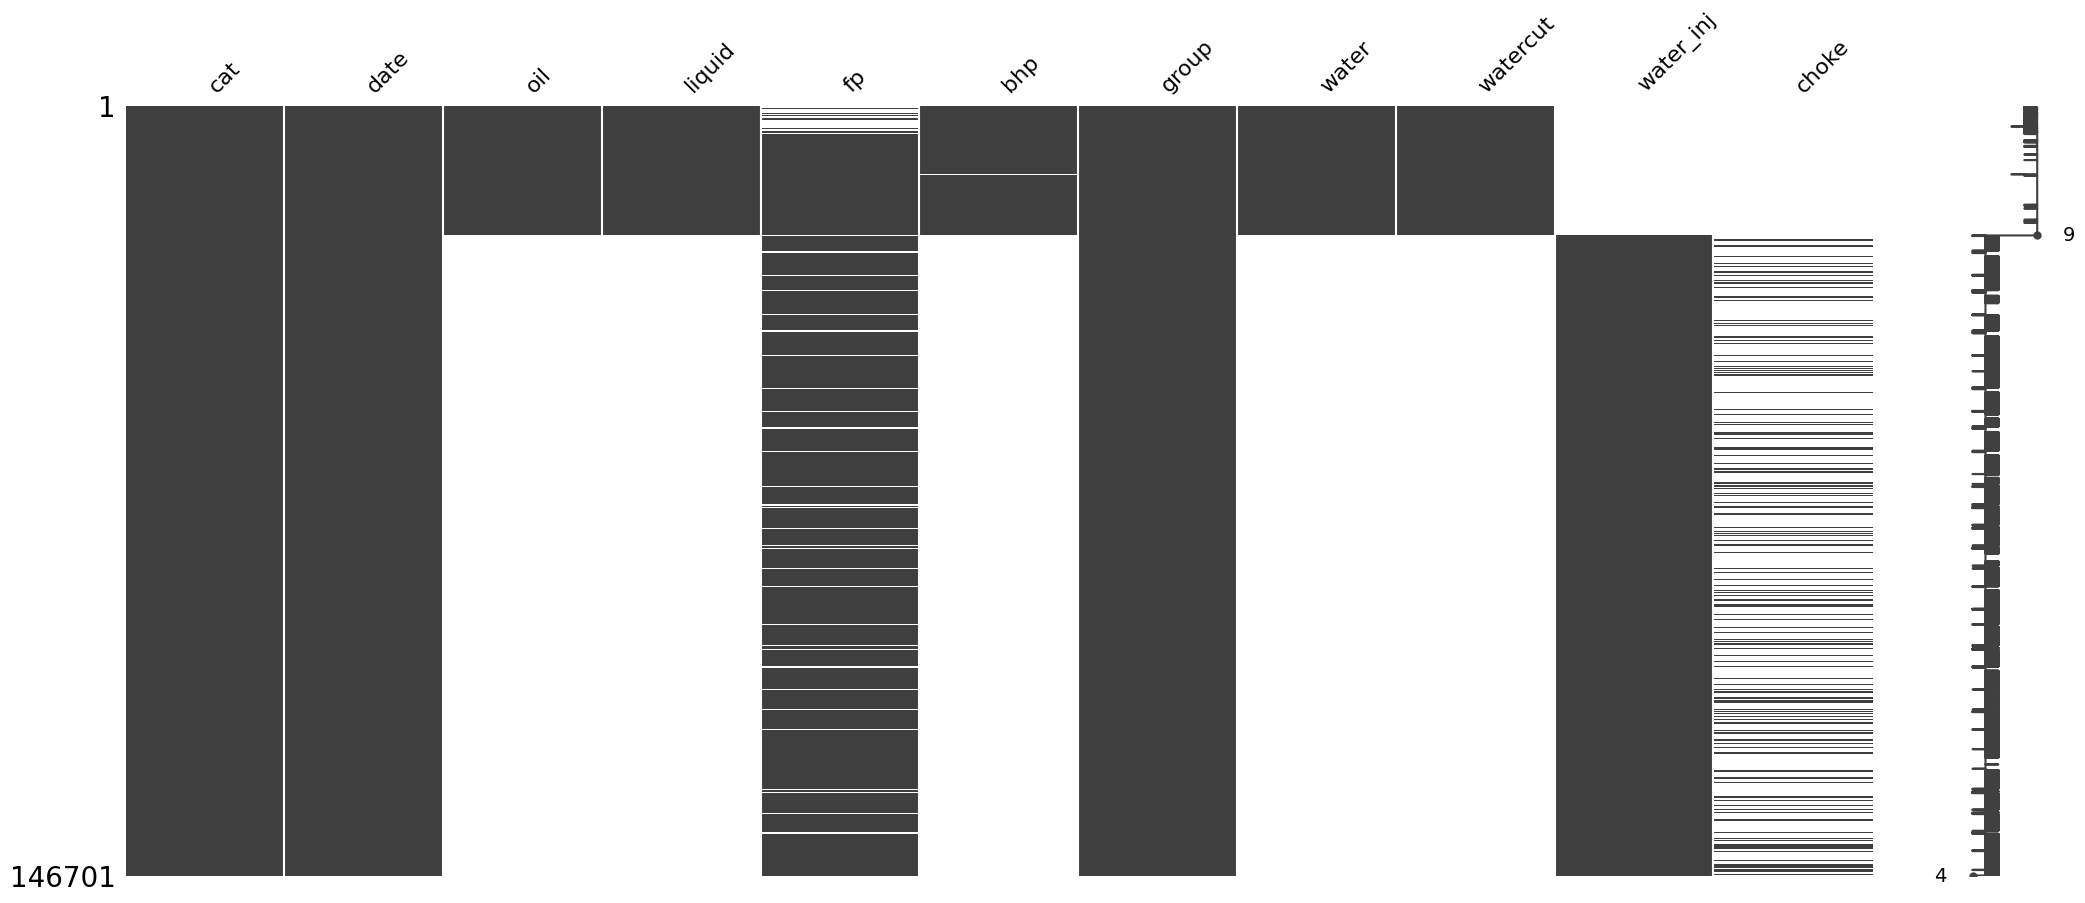

In [121]:
msno.matrix(df)

В колонках bhp(для P), choke(для I) и fp (и для P, и для I) содержатся пропущенные значения. Заполним последним зарегистрированным.

In [122]:
dict_fillna = {'P': ['bhp', 'fp'], 'I': ['choke', 'fp']}

def fill_nan(df: pd.DataFrame, group) -> pd.DataFrame:
    new_df = df.copy()
    for col in dict_fillna.get(group):
        series = new_df.loc[:, col]
        ref = series.loc[series.first_valid_index()]
        if np.isnan(ref) and (col == 'fp'):
            print("cringe")
        for i, val in series.items():
            if np.isnan(val):
                series.update(pd.Series([ref], index = [i]))
            else:
                ref = val
    return new_df

In [123]:
cats = df['cat'].unique()
groups = ['P', 'I']

In [124]:
for group in groups:
    for cat in cats:
        well = df.loc[(df['cat'] == cat) & (df['group'] == group)]
        if (well.empty):
            continue
        df.loc[(df['cat'] == cat) & (df['group'] == group)] = fill_nan(well, group)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146701 entries, 0 to 122039
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   cat        146701 non-null  int64         
 1   date       146701 non-null  datetime64[ns]
 2   oil        24661 non-null   float64       
 3   liquid     24661 non-null   float64       
 4   fp         146701 non-null  float64       
 5   bhp        24661 non-null   float64       
 6   group      146701 non-null  object        
 7   water      24661 non-null   float64       
 8   watercut   24661 non-null   float64       
 9   water_inj  122040 non-null  float64       
 10  choke      122040 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 13.4+ MB


<Axes: >

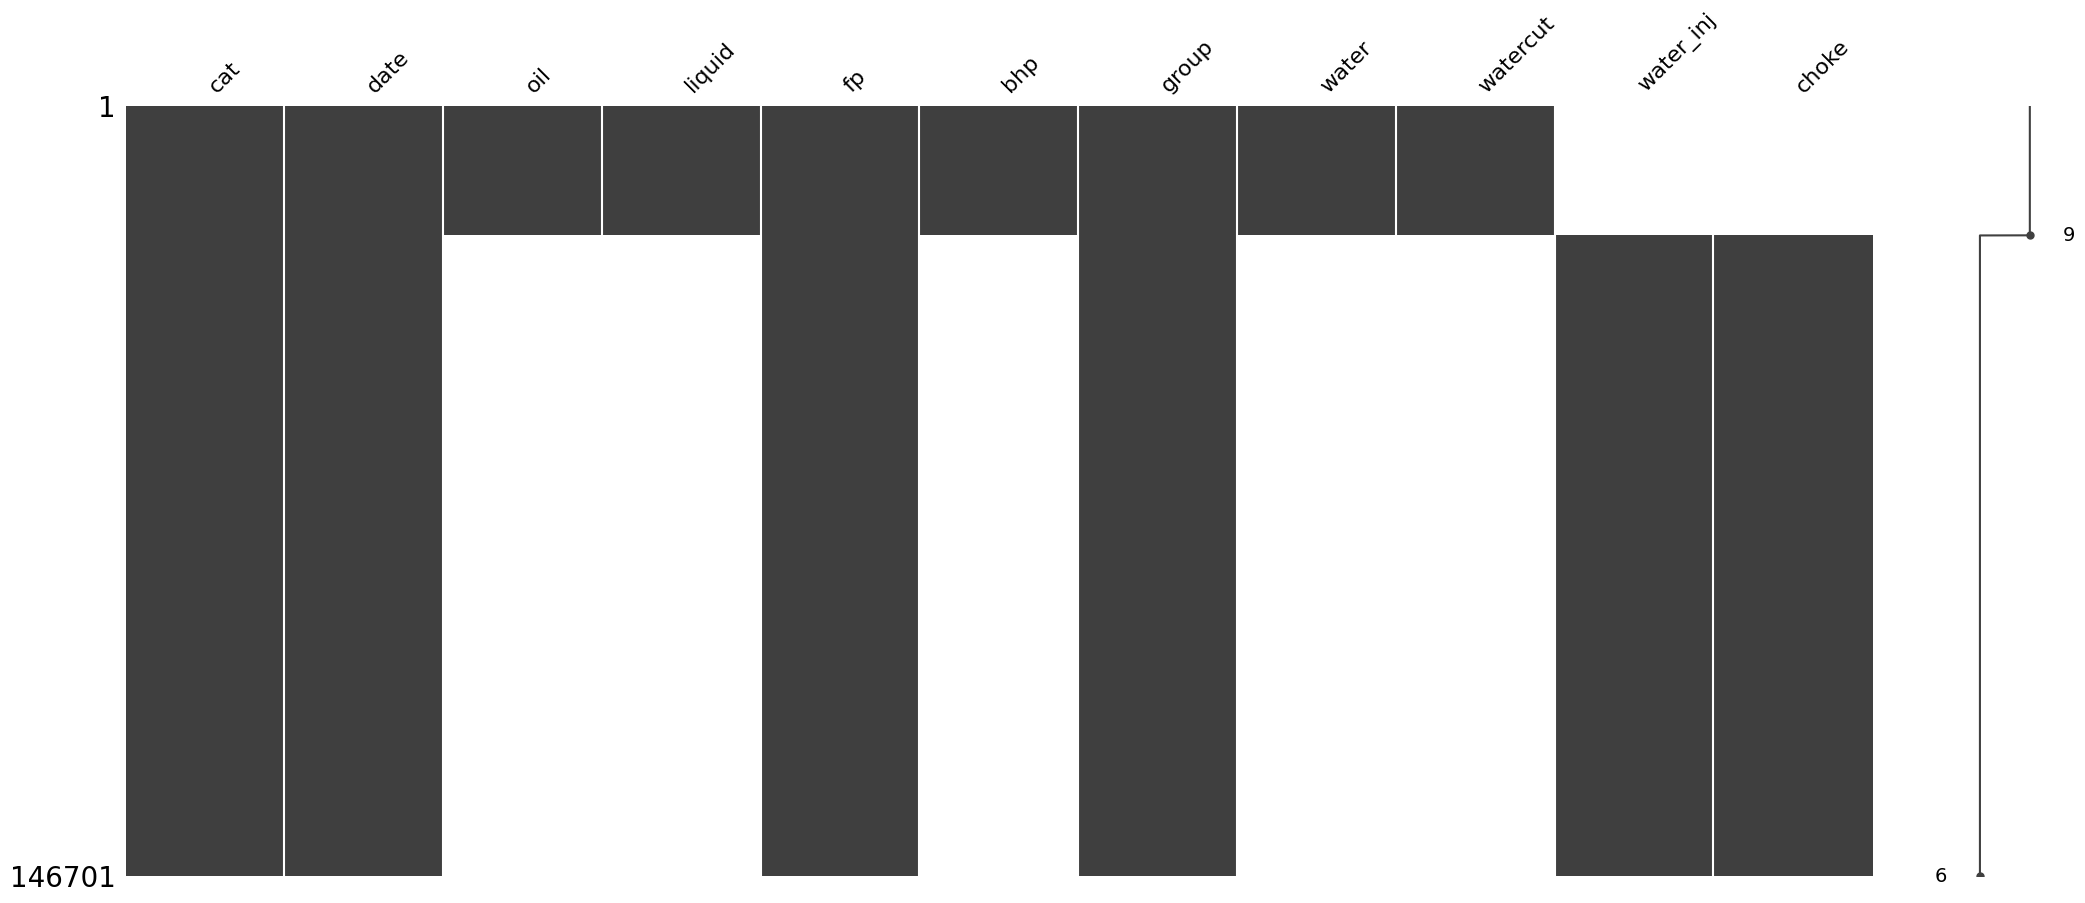

In [126]:
msno.matrix(df)

In [127]:
path = Path.joinpath(
    path_to_processed_data,
    "well_data.csv",
)
df.to_csv(path, index=False)

In [ ]:
# # just rename sample's columns

# sample = pd.read_excel(Path.joinpath(path_to_raw_data, "Sample_submission.xlsx"))
# sample

,Well,Date,Oil production rate
0,0,1987-12-05,50
1,0,1987-12-06,50
2,0,1987-12-07,50
3,0,1987-12-08,50
4,0,1987-12-09,50
...,...,...,...
8094,114,1991-09-02,50
8095,114,1991-09-03,50
8096,114,1991-09-04,50
8097,114,1991-09-05,50


In [128]:
# create coords dataframe

df_coords = pd.read_excel(Path.joinpath(path_to_raw_data, "Well_coordinates.xlsx"))
df_coords

,Well,X coordinate,Y coordinate
0,0,2026,6027
1,1,3025,6023
2,2,1518,5518
3,3,2516,5514
4,4,3530,5511
...,...,...,...
110,110,5506,998
111,111,2029,509
112,112,2996,514
113,113,4996,514


In [129]:
rename_dict = {"Well": "cat", "X coordinate": "x", "Y coordinate": "y"}
df_coords.rename(columns=rename_dict, inplace=True)

df_coords.head()

,cat,x,y
0,0,2026,6027
1,1,3025,6023
2,2,1518,5518
3,3,2516,5514
4,4,3530,5511


In [130]:
path = Path.joinpath(
    path_to_processed_data,
    "coords.csv",
)
df_coords.to_csv(path, index=False)